# Instalación e Importación de librerias

In [225]:
#pip install pySankey
#pip install bokeh_sampledata
#pip install holoviews
#C:\Users\monic\OneDrive\Desktop\AnalisisPajaros\.conda\python.exe -m pip install statsmodels
#C:\Users\monic\OneDrive\Desktop\AnalisisPajaros\.conda\python.exe -m pip install mord
#C:\Users\monic\OneDrive\Desktop\AnalisisPajaros\.conda\python.exe -m pip install sklearn

In [226]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
from pySankey.sankey import sankey
from matplotlib.patches import Patch

# Importación DataFrame y corrección de pequeños errores

In [227]:
# Importar mi DataFrame
censo = pd.read_csv(r'C:/Users/monic/OneDrive/Desktop/It Academmy - Data Analysis/Projecte/Python archibos buenos/tabla_madre.csv', delimiter=',', quotechar='"')

# Reemplazo de ciertos valores por unos más correctos
censo['LR2021 Repro'] = censo['LR2021 Repro'].replace('VU(EN/VU)', 'VU')
censo['Estatus Consolidado'] = censo['Estatus Consolidado'].replace('VU(EN/VU)', 'VU')
censo['LR2004'] = censo['LR2004'].replace('EN/VU', 'VU')

# Cambio a variable númerica
censo['Average SST month'] = pd.to_numeric(censo['Average SST month'], errors='coerce')
censo['SST change'] = pd.to_numeric(censo['SST change'], errors='coerce')

# Cálculo del área total Marina Protegida en el mar Balear
censo['Total_MPAs'] = censo['World heritage site'] + censo['SPAMI'] + censo['Marine Natura 2000 site'] + censo['Marine Natura 2000 proposed site'] + censo['MPA with a national statute'] + censo['Biosphere reserve']

# Pongo el nombre de la categoría en columnas 
categorias_esp = {
    'LC': 'Preocupación Menor',
    'EN': 'En Peligro',
    'VU': 'Vulnerable',
    'NT': 'Casi Amenazado',
    'NE': 'No Evaluado',
    'DD': 'Datos Insuficientes',
    'CR/EN': 'En Peligro Crítico/En Peligro',
    'CR/VU': 'En Peligro Crítico/Vulnerable',
    'CR': 'En Peligro Crítico',
}
censo['Nombre_cetegoria_2021'] = censo['Estatus Consolidado'].map(categorias_esp)
censo['Nombre_categoria_2004']=censo['LR2004'].map(categorias_esp)

# Selecciono solo los datos de caen dentro de los años 2007 a 2024
censo = censo[censo['year'].isin(list(range(2007,2024)))]

censo

,date,speciesname,Scientific name,year,yday,fecha,fecha_formateada,month,nombre_mes,count_aves,...,MPA with a national statute,Marine Natura 2000 proposed site,Marine Natura 2000 site,Ramsar site,SPAMI,World heritage site,calculo,Total_MPAs,Nombre_cetegoria_2021,Nombre_categoria_2004
75,39102,Balearic Shearwater,Puffinus mauretanicus,2007,20,20/01/2007,2007-01-20,1,Enero,9,...,2594.00,156.01,2146.42,0.0,247.22,135.56,0.0,9729.26,En Peligro Crítico,En Peligro Crítico
76,39102,Balearic-/Yelkouan Shearwater,Puffinus sp.,2007,20,20/01/2007,2007-01-20,1,Enero,4,...,2594.00,156.01,2146.42,0.0,247.22,135.56,0.0,9729.26,En Peligro Crítico/Vulnerable,En Peligro Crítico/En Peligro
77,39102,Black-headed Gull,Chroicocephalus ridibundus,2007,20,20/01/2007,2007-01-20,1,Enero,5,...,2594.00,156.01,2146.42,0.0,247.22,135.56,0.0,9729.26,Preocupación Menor,No Evaluado
78,39102,Cormorant,Phalacrocorax carbo,2007,20,20/01/2007,2007-01-20,1,Enero,12,...,2594.00,156.01,2146.42,0.0,247.22,135.56,0.0,9729.26,Preocupación Menor,No Evaluado
79,39102,Gannet,Morus bassanus,2007,20,20/01/2007,2007-01-20,1,Enero,13,...,2594.00,156.01,2146.42,0.0,247.22,135.56,0.0,9729.26,Preocupación Menor,No Evaluado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,45262,Razorbill,Alca torda,2023,336,02/12/2023,2023-12-02,12,Diciembre,12,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,Datos Insuficientes,No Evaluado
1926,45262,Sandwich Tern,Thalasseus sandvicensis,2023,336,02/12/2023,2023-12-02,12,Diciembre,1,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,Vulnerable,Casi Amenazado
1927,45262,Shag,Phalacrocorax aristotelis,2023,336,02/12/2023,2023-12-02,12,Diciembre,9,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,Vulnerable,Vulnerable
1928,45262,Yelkouan Shearwater,Puffinus yelkouan,2023,336,02/12/2023,2023-12-02,12,Diciembre,58,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,Vulnerable,No Evaluado


# Visulizaciones

In [228]:
# Selecciono los meses de verano e invierno
invierno = list(range(1, 3)) + list(range(9, 13))
verano = list(range(3, 9))

# Seleccion de los individuos invernantes
invernantes = censo[censo['month'].isin(invierno)]
invernantes_count= invernantes.groupby(['Ordre', 'Scientific name', 'NOMBRE COMÚN', 'Catalan name'])['count_aves'].sum().reset_index()

# Selección de los individuos estivales
estivales = censo[censo['month'].isin(verano)]
estivales_count= estivales.groupby(['Ordre', 'Scientific name', 'NOMBRE COMÚN', 'Catalan name'])['count_aves'].sum().reset_index()

## Ivernantes

In [229]:
fig = px.sunburst(invernantes_count,
                  path=['Ordre', 'NOMBRE COMÚN'], # Creo la jerarquia
                  values='count_aves', # El numero de individuos
                  title='Numero de Individuos Invernantes por Orden Taxonómico y Especie',
                  color_discrete_sequence=px.colors.qualitative.Pastel,
                  hover_name = 'NOMBRE COMÚN',
                  hover_data={
                          "NOMBRE COMÚN": True,
                          'Catalan name':True,
                          'Ordre':True,
                          "Scientific name": True,
                          "count_aves":True
                          }, 
                  height=1000,  
                  width=1000 
                 )

# Personalización del hover data
fig.update_traces(
      hovertemplate="<b>Orden:</b> %{customdata[2]}<br>" + # El orden
                  "<b>Especie:</b> %{label}<br>" + # El nombre científico
                  "<b>Nombre Catalán:</b> %{customdata[1]}<br>" + 
                  "<b>Nombre Científico:</b> %{customdata[3]}<br>" + 
                  "<b>Observaciones:</b> %{value}<extra></extra>",
    textfont=dict(size=12, family="Arial", color="black"),
    insidetextfont=dict(family="Arial", size=14, color="black", weight="bold"), 
    insidetextorientation='radial'
)

fig.show()

# Guardar archivo en HTML
# fig.write_html("censo_aves_interactivo.html")

## Estivales

In [230]:
fig = px.sunburst(estivales_count,
                  path=['Ordre', 'NOMBRE COMÚN'], # Creo la jerarquia
                  values='count_aves', # El numero de individuos
                  title='Numero de Individuos Invernantes por Orden Taxonómico y Especie',
                  color_discrete_sequence=px.colors.qualitative.Pastel,
                  hover_name = 'NOMBRE COMÚN',
                  hover_data={
                          "NOMBRE COMÚN": True,
                          'Catalan name':True,
                          'Ordre':True,
                          "Scientific name": True,
                          "count_aves":True
                          }, 
                  height=1000,  
                  width=1000 
                 )

# Personalización del hover data
fig.update_traces(
      hovertemplate="<b>Orden:</b> %{customdata[2]}<br>" + # El orden
                  "<b>Especie:</b> %{label}<br>" + # El nombre científico
                  "<b>Nombre Catalán:</b> %{customdata[1]}<br>" + 
                  "<b>Nombre Científico:</b> %{customdata[3]}<br>" + 
                  "<b>Observaciones:</b> %{value}<extra></extra>",
    textfont=dict(size=12, family="Arial", color="black"),
    insidetextfont=dict(family="Arial", size=14, color="black", weight="bold"), 
    insidetextorientation='radial'
)

fig.show()

# Guardar archivo en HTML
# fig.write_html("censo_aves_interactivo.html")

## Porcentaje de especies por categoria de protección en 2007 y 2023

In [231]:
# Paleta de colores que usaré
color= {
    'CR': '#F5A9A9',
    'En Peligro Crítico':'#F5A9A9',
    'CR/EN': '#FFC28E',
    'En Peligro Crítico/En Peligro':'#FFC28E',
    'CR/VU': '#FFC28E',
    'En Peligro Crítico/Vulnerable':'#FFC28E',
    'EN': '#FFEB9C',
    'En Peligro':'#FFEB9C',
    'NE': '#C8A2E8',
    'No Evaluado':'#C8A2E8',
    'NT': '#A5D6F2',
    'Casi Amenazado':'#A5D6F2',
    'VU': '#FFFFB2',
    'Vulnerable':'#FFFFB2',
    'LC': '#C8E6A7',
    'Preocupación Menor':'#C8E6A7',
    'DD': '#DCDCDC',
    'Datos Insuficientes':'#DCDCDC',
    'Favorable': '#C8E6A7',
    'Sin Variaciones': '#A5D6F2', 
    'Sin Variaciones/Desfavorable': '#FFEB9C', 
    'Desfavorable': '#F5A9A9', 
    'Datos Insuficientes': '#DCDCDC', 
    'No Evaluada': '#C8A2E8' 
}

### 2007

In [248]:
total_por_estatus_2007 = censo[censo['year'] == 2023]
total_por_estatus_2007

,date,speciesname,Scientific name,year,yday,fecha,fecha_formateada,month,nombre_mes,count_aves,...,MPA with a national statute,Marine Natura 2000 proposed site,Marine Natura 2000 site,Ramsar site,SPAMI,World heritage site,calculo,Total_MPAs,Nombre_cetegoria_2021,Nombre_categoria_2004
1804,44941,Balearic Shearwater,Puffinus mauretanicus,2023,15,15/01/2023,2023-01-15,1,Enero,5,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,En Peligro Crítico,En Peligro Crítico
1805,44941,Balearic-/Yelkouan Shearwater,Puffinus sp.,2023,15,15/01/2023,2023-01-15,1,Enero,3,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,En Peligro Crítico/Vulnerable,En Peligro Crítico/En Peligro
1806,44941,Cormorant,Phalacrocorax carbo,2023,15,15/01/2023,2023-01-15,1,Enero,1,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,Preocupación Menor,No Evaluado
1807,44941,Gannet,Morus bassanus,2023,15,15/01/2023,2023-01-15,1,Enero,6,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,Preocupación Menor,No Evaluado
1808,44941,Great Skua,Stercorarius skua,2023,15,15/01/2023,2023-01-15,1,Enero,1,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,No Evaluado,No Evaluado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,45262,Razorbill,Alca torda,2023,336,02/12/2023,2023-12-02,12,Diciembre,12,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,Datos Insuficientes,No Evaluado
1926,45262,Sandwich Tern,Thalasseus sandvicensis,2023,336,02/12/2023,2023-12-02,12,Diciembre,1,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,Vulnerable,Casi Amenazado
1927,45262,Shag,Phalacrocorax aristotelis,2023,336,02/12/2023,2023-12-02,12,Diciembre,9,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,Vulnerable,Vulnerable
1928,45262,Yelkouan Shearwater,Puffinus yelkouan,2023,336,02/12/2023,2023-12-02,12,Diciembre,58,...,49295.58,4459.98,20091.67,0.0,247.22,135.56,0.0,79481.71,Vulnerable,No Evaluado


In [232]:
# Quiero ver el numero de especies por su estado de conservación y hacer el porcentage para los datos de 2007.
total_por_estatus_2007 = censo[censo['year'] == 2007]

total_por_estatus_2007=total_por_estatus_2007.groupby(['year','LR2004'])['speciesid'].nunique().reset_index()

total_por_estatus_2007

# Calcular el gran total de especies
total_especies = censo[censo['year'] == 2007]
total_especies = total_especies['speciesid'].nunique()

# Calcular el porcentaje de especies por cada estatus
total_por_estatus_2007['porcentaje_por_estatus'] = ((total_por_estatus_2007['speciesid'] / total_especies) * 100).round(2)

total_por_estatus_2007.rename(columns={
    'LR2004':'Estado'    
}, inplace=True)

total_por_estatus_2007

,year,Estado,speciesid,porcentaje_por_estatus
0,2007,CR,1,5.26
1,2007,CR/EN,1,5.26
2,2007,EN,1,5.26
3,2007,NE,10,52.63
4,2007,NT,2,10.53
5,2007,VU,4,21.05


### 2023

In [233]:
total_por_estatus_2023 = censo[censo['year'] == 2023]

total_por_estatus_2023=total_por_estatus_2023.groupby(['year','Estatus Consolidado'])['speciesid'].nunique().reset_index()

total_por_estatus_2023

# Calcular el gran total de especies
total_especies = censo[censo['year'] == 2023]
total_especies = total_especies['speciesid'].nunique()

# Calcular el porcentaje de especies por cada estatus
total_por_estatus_2023['porcentaje_por_estatus'] = (total_por_estatus_2023['speciesid'] / total_especies) * 100

total_por_estatus_2023.rename(columns={
    'Estatus Consolidado':'Estado'    
}, inplace=True)

total_por_estatus_2023

,year,Estado,speciesid,porcentaje_por_estatus
0,2023,CR,2,10.0
1,2023,CR/VU,1,5.0
2,2023,DD,2,10.0
3,2023,EN,1,5.0
4,2023,LC,4,20.0
5,2023,NE,3,15.0
6,2023,NT,3,15.0
7,2023,VU,4,20.0


### 2007 y 2023

In [234]:
total_estatus_2007_2023 = pd.concat([total_por_estatus_2007, total_por_estatus_2023], axis=0, ignore_index=True)
total_estatus_2007_2023 

,year,Estado,speciesid,porcentaje_por_estatus
0,2007,CR,1,5.26
1,2007,CR/EN,1,5.26
2,2007,EN,1,5.26
3,2007,NE,10,52.63
4,2007,NT,2,10.53
5,2007,VU,4,21.05
6,2023,CR,2,10.00
7,2023,CR/VU,1,5.00
8,2023,DD,2,10.00
9,2023,EN,1,5.00


### Grafico para 2007

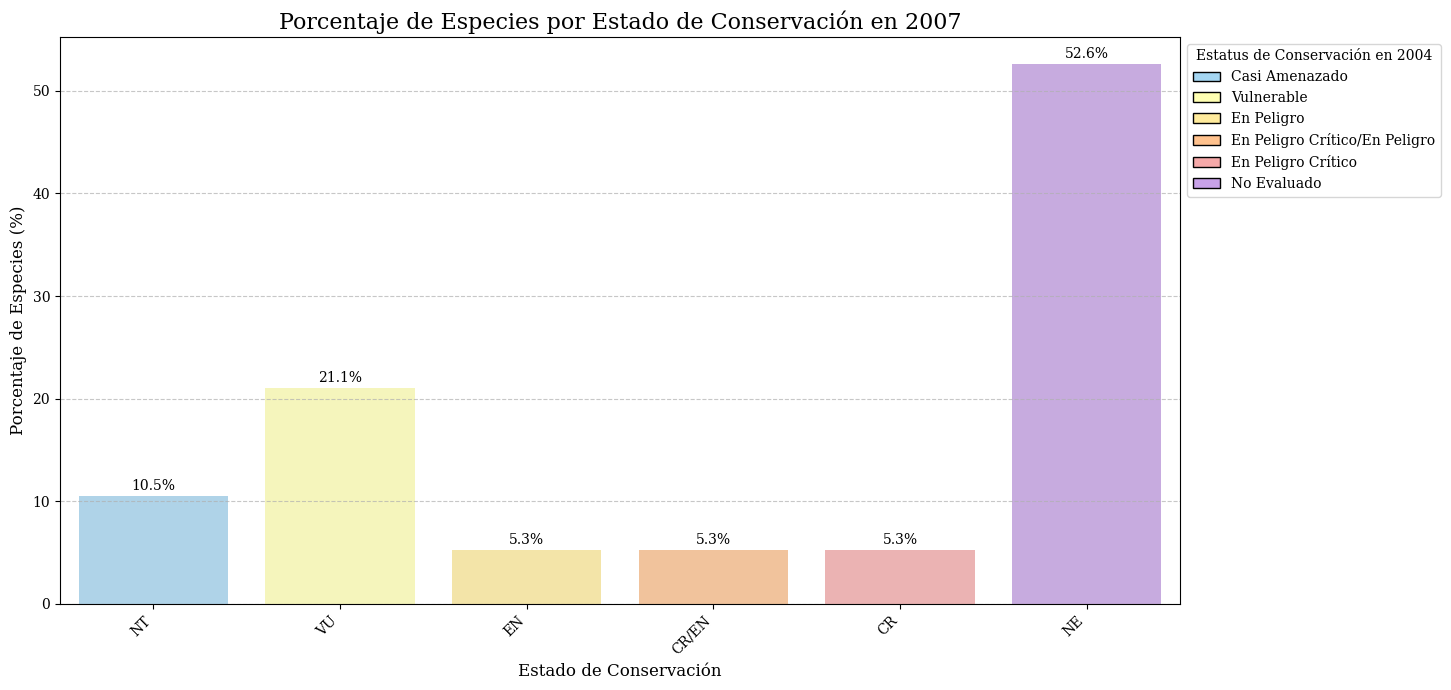

In [235]:
# Leyenda de las categorias 2004
leyenda = {
    #'LC': 'Preocupación Menor',
    'NT':'Casi Amenazado',
    'VU': 'Vulnerable',
    'EN':'En Peligro',
    'CR/EN':'En Peligro Crítico/En Peligro',
    'CR':'En Peligro Crítico',
    'NE': 'No Evaluado'  
}

# Ordenar mi DF con orden de leyenda
orden = list(leyenda.keys()) #Lista con los elementos del diccionario

total_por_estatus_2007['Estado']=pd.Categorical(total_por_estatus_2007['Estado'], categories=orden, ordered=True) # Pasar columna estado a categorica con orden 

total_por_estatus2007=total_por_estatus_2007.sort_values('Estado')

# Grafico de Barras
plt.figure(figsize=(12, 7)) # Ajusta el tamaño de la figura
ax = sns.barplot(x=total_por_estatus_2007['Estado'], 
            y=total_por_estatus_2007['porcentaje_por_estatus'], 
            hue = total_por_estatus_2007['Estado'] ,
            palette=color, 
            order=orden, 
            hue_order=orden,  # Uso el color de la paleta que cree antes y el orden de las categorias que he creado más arriba
            dodge=False, 
            ax=plt.gca(), 
            legend=False)

plt.title('Porcentaje de Especies por Estado de Conservación en 2007', fontsize=16)
plt.xlabel('Estado de Conservación', fontsize=12)
plt.ylabel('Porcentaje de Especies (%)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 

# Creo una leyenda con mi diccionario leyenda
elementos_visuales = []
elementos_visuales_leyenda = []

for key in orden:
    if key in color:
        elementos_visuales.append(Patch(facecolor=color[key], edgecolor='black', linewidth=1))
        elementos_visuales_leyenda.append(leyenda[key])
        
# Añadir la leyenda al grafico
ax.legend(handles = elementos_visuales, labels = elementos_visuales_leyenda,
          title="Estatus de Conservación en 2004",
          loc='upper left',
          bbox_to_anchor=(1, 1)
          )

# Añadir las etiquetas de datos
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%' ,label_type='edge', padding=2)
    
plt.savefig('especies_estado_conservacion_2007.png', dpi=300, bbox_inches='tight')
    
plt.show()

### Grafico para 2023

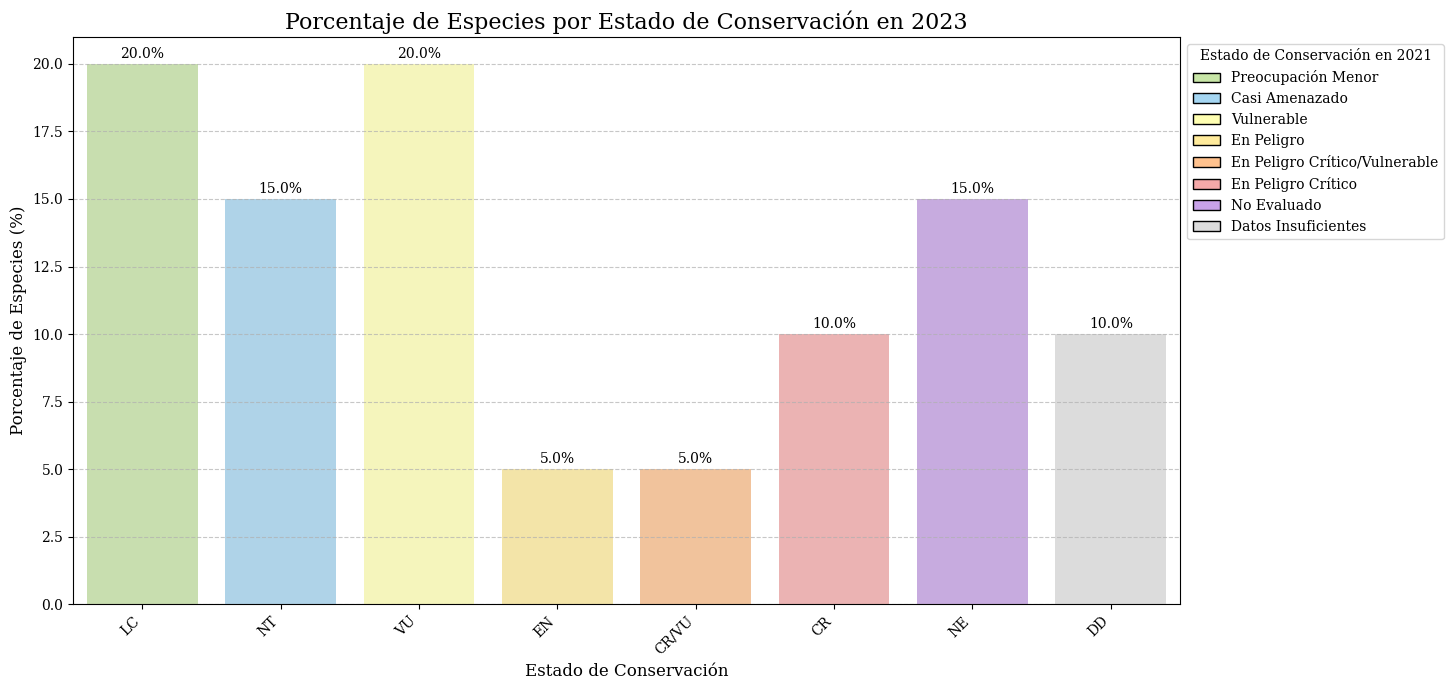

In [236]:
#Leyenda de los datos de 2023
leyenda_2023 = {
    'LC': 'Preocupación Menor',
    'NT':'Casi Amenazado',
    'VU': 'Vulnerable',
    'EN':'En Peligro',
    'CR/VU':'En Peligro Crítico/Vulnerable',
    'CR':'En Peligro Crítico',
    'NE': 'No Evaluado', 
    'DD': 'Datos Insuficientes'
}

# Ordenar mi DF con orden de leyenda
orden_2023 = list(leyenda_2023.keys())

total_por_estatus_2023['Estado']=pd.Categorical(total_por_estatus_2023['Estado'], categories=orden_2023, ordered=True) #Pasa Estado a categorico con el orden del diccionario leyenda

total_por_estatus_2023=total_por_estatus_2023.sort_values('Estado')


# Gráfico de barras
plt.figure(figsize=(12, 7)) 
ax = sns.barplot(x=total_por_estatus_2023['Estado'], 
            y=total_por_estatus_2023['porcentaje_por_estatus'], 
            hue = total_por_estatus_2023['Estado'] ,
            palette=color, 
            order=orden_2023, 
            hue_order=orden_2023, 
            dodge=False, 
            ax=plt.gca(), 
            legend=False)

plt.title('Porcentaje de Especies por Estado de Conservación en 2023', fontsize=16)
plt.xlabel('Estado de Conservación', fontsize=12)
plt.ylabel('Porcentaje de Especies (%)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 

# Creo elementos de una leyenda con mi diccionario leyenda
elementos_visuales = []
elementos_visuales_leyenda = []

for key in orden_2023:
    if key in color:
        elementos_visuales.append(Patch(facecolor=color[key], edgecolor='black', linewidth=1))
        elementos_visuales_leyenda.append(leyenda_2023[key])
        
# Añadir la leyenda al grafico
ax.legend(handles = elementos_visuales, 
          labels = elementos_visuales_leyenda,
          title="Estado de Conservación en 2021",
          loc='upper left',
          bbox_to_anchor=(1, 1)
          )

# Añadir las etiquetas de datos
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%' ,label_type='edge', padding=2)

plt.savefig('especies_estado_conservacion_2023.png', dpi=300, bbox_inches='tight')
plt.show()

### Datos combinados 2007 y 2023

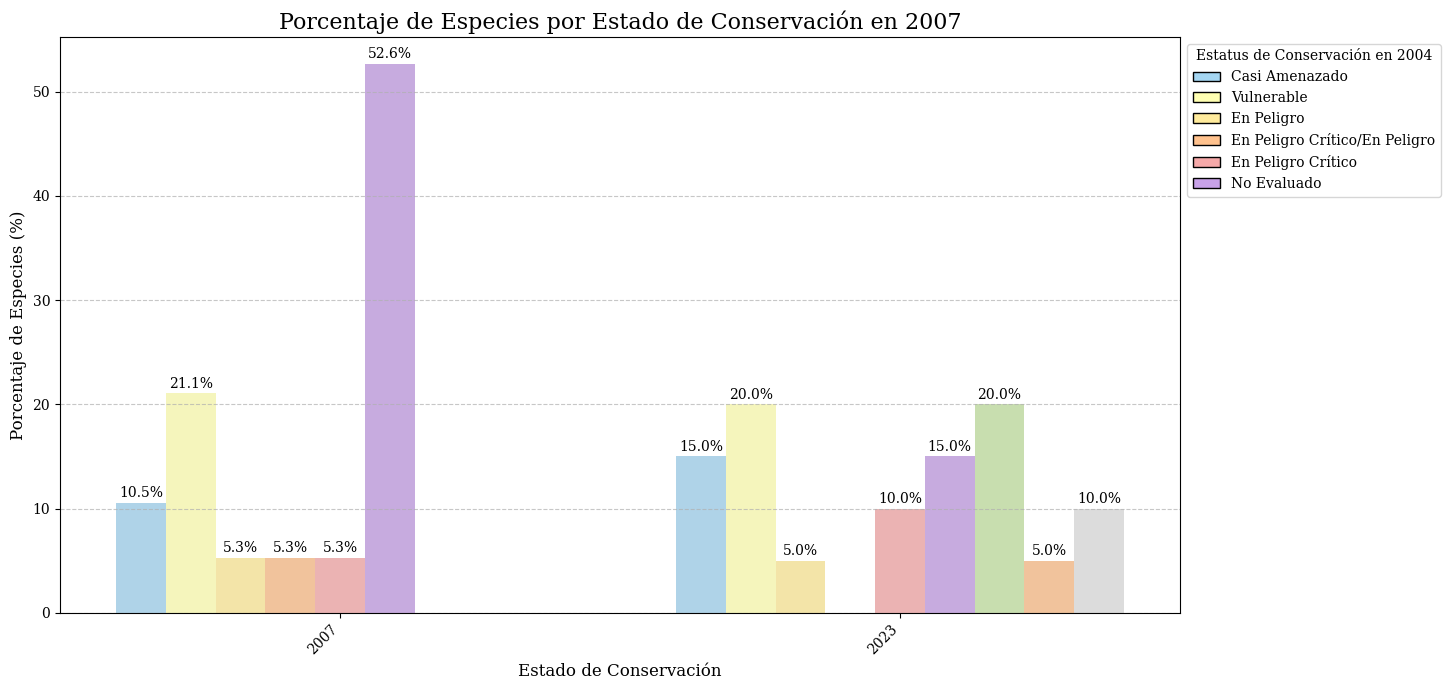

In [237]:
# Sigo una estrategia diferente para crear el orden del DataFrame
# Leyenda de las categorias 2004_2021
leyenda_2006_2023 = {
    'LC': 'Preocupación Menor',
    'NT':'Casi Amenazado',
    'VU': 'Vulnerable',
    'EN':'En Peligro',
    'CR/VU':'En Peligro Crítico/Vulnerable',
    'CR/EN':'En Peligro Crítico/En Peligro',
    'CR':'En Peligro Crítico',
    'NE': 'No Evaluado',
    'DD': 'Datos Insuficientes'  
}

# Este es el diccionario que me generará el orden de mi DF
leyenda_orden = {
    'LC': 1,
    'NT':2,
    'VU': 3,
    'EN':4,
    'CR/VU':5,
    'CR/EN':6,
    'CR':7,
    'NE': 8,
    'DD': 9 
}

# Mapeo el DF para añadir la columna de orden
total_estatus_2007_2023['orden'] = total_estatus_2007_2023['Estado'].map(leyenda_orden)

# Ordeno mi DF
total_estatus_2007_2023=total_estatus_2007_2023.sort_values(['year','orden'])


# Grafico de Barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=total_estatus_2007_2023['year'], 
            y=total_estatus_2007_2023['porcentaje_por_estatus'], 
            hue = total_estatus_2007_2023['Estado'] ,
            palette=color,  # Uso el color de la paleta que cree antes y el orden de las categorias que he creado más arriba
            ax=plt.gca(), 
            legend=False)

plt.title('Porcentaje de Especies por Estado de Conservación en 2007', fontsize=16)
plt.xlabel('Estado de Conservación', fontsize=12)
plt.ylabel('Porcentaje de Especies (%)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 

# Creo una leyenda con mi diccionario leyenda
elementos_visuales = []
elementos_visuales_leyenda = []

for key in orden:
    if key in color:
        elementos_visuales.append(Patch(facecolor=color[key], edgecolor='black', linewidth=1))
        elementos_visuales_leyenda.append(leyenda_2006_2023[key])
        
# Añadir la leyenda al grafico
ax.legend(handles = elementos_visuales, labels = elementos_visuales_leyenda,
          title="Estatus de Conservación en 2004",
          loc='upper left',
          bbox_to_anchor=(1, 1)
          )

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%' ,label_type='edge', padding=2)
    

    
plt.show()

Este grafico tiene espacios vacios tanto en 2007 como 2023 porque las categorias de las aves en 2004 y 2021 no son exactamente las mismas, por este motivo no usaré este grafico

### Porcentaje de especies por cambio de categoria en 2023

In [238]:
total_por_estatus_2023_cambio = censo[censo['year'] == 2023]

total_por_estatus_2023_cambio=total_por_estatus_2023_cambio.groupby(['EVOLUCIÓN CATEGORÍA 2004-2021'])['speciesid'].nunique().reset_index()

total_por_estatus_2023_cambio

# Calcular el gran total de especies
total_especies = censo[censo['year'] == 2023]
total_especies = total_especies['speciesid'].nunique()

# Calcular el porcentaje de especies por cada estatus
total_por_estatus_2023_cambio['porcentaje_por_estatus_cambio'] = (total_por_estatus_2023_cambio['speciesid'] / total_especies) * 100

total_por_estatus_2023_cambio

,EVOLUCIÓN CATEGORÍA 2004-2021,speciesid,porcentaje_por_estatus_cambio
0,Datos Insuficientes,2,10.0
1,Desfavorable,5,25.0
2,Favorable,3,15.0
3,No Evaluada,3,15.0
4,Sin Variaciones,6,30.0
5,Sin Variaciones/Desfavorable,1,5.0


In [239]:
# Lista con los elementos ordenados
orden_cambio_categorias= ['Favorable', 'Sin Variaciones', 'Sin Variaciones/Desfavorable','Desfavorable','Datos Insuficientes', 'No Evaluada']

# Diccionario para luego hacer la leyenda manualmente
leyenda_cambio = {
    'Favorable': 'Favorable',
    'Sin Variaciones': 'Sin Variaciones',
    'Sin Variaciones/Desfavorable': 'Sin Variaciones/Desfavorable',
    'Desfavorable': 'Desfavorable',
    'Datos Insuficientes': 'Datos Insuficientes',
    'No Evaluada': 'No Evaluada'
}

# Como antes, paso la columna a categorica y ordeno el DF.
total_por_estatus_2023_cambio['EVOLUCIÓN CATEGORÍA 2004-2021'] = pd.Categorical(
    total_por_estatus_2023_cambio['EVOLUCIÓN CATEGORÍA 2004-2021'],
    categories=orden_cambio_categorias,
    ordered=True
)
total_por_estatus_2023_cambio = total_por_estatus_2023_cambio.sort_values('EVOLUCIÓN CATEGORÍA 2004-2021')

total_por_estatus_2023_cambio


,EVOLUCIÓN CATEGORÍA 2004-2021,speciesid,porcentaje_por_estatus_cambio
2,Favorable,3,15.0
4,Sin Variaciones,6,30.0
5,Sin Variaciones/Desfavorable,1,5.0
1,Desfavorable,5,25.0
0,Datos Insuficientes,2,10.0
3,No Evaluada,3,15.0


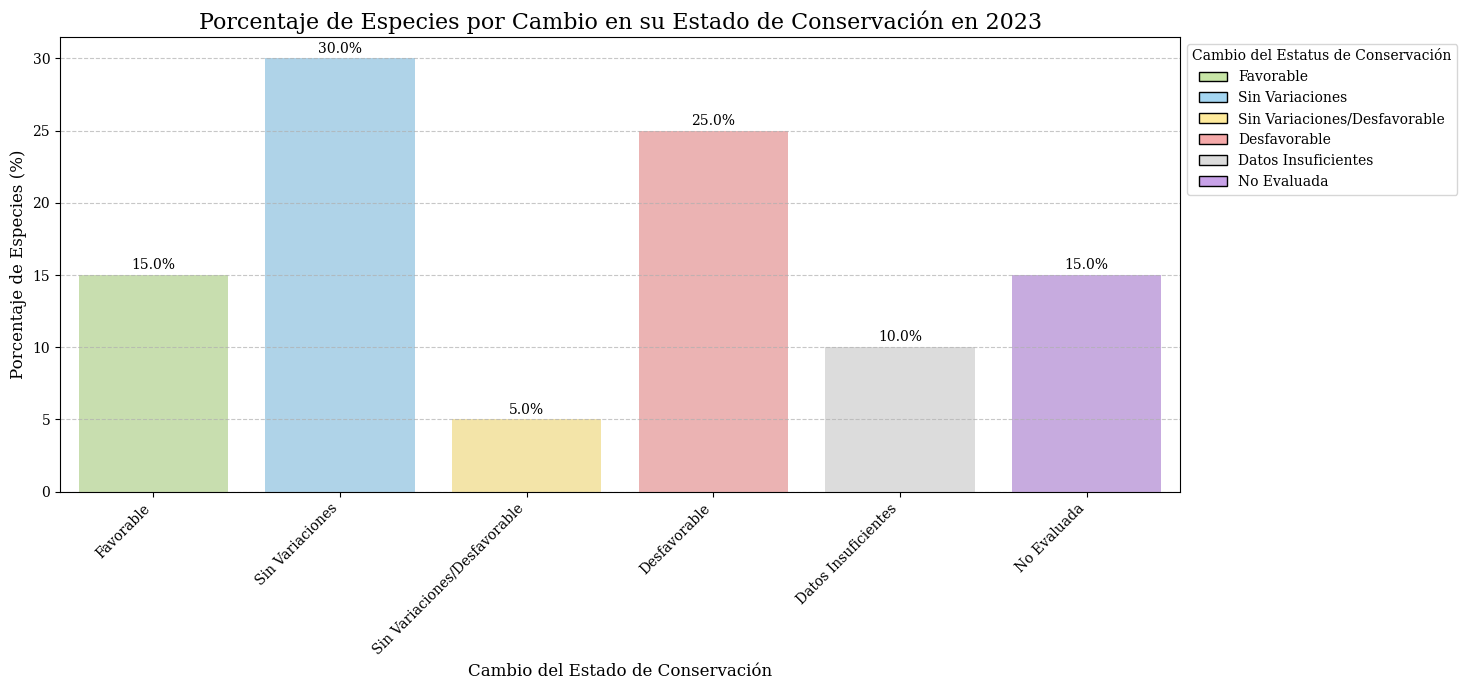

In [240]:
plt.figure(figsize=(12, 7)) # Ajusta el tamaño de la figura
ax=sns.barplot(x=total_por_estatus_2023_cambio['EVOLUCIÓN CATEGORÍA 2004-2021'], 
            y=total_por_estatus_2023_cambio['porcentaje_por_estatus_cambio'], 
            hue = total_por_estatus_2023_cambio['EVOLUCIÓN CATEGORÍA 2004-2021'],
            palette=color, 
            order=orden_cambio_categorias,
            dodge=False,
            ax=plt.gca(), 
            legend=False)

plt.title('Porcentaje de Especies por Cambio en su Estado de Conservación en 2023', fontsize=16)
plt.xlabel('Cambio del Estado de Conservación', fontsize=12)
plt.ylabel('Porcentaje de Especies (%)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 

# Creo listas para los elementos visuales de la leyenda
elementos_visuales = []
elementos_visuales_leyenda = []

# Añadir los elementos visuales
for key in orden_cambio_categorias:
    if key in color:
        elementos_visuales.append(Patch(facecolor=color[key], edgecolor='black', linewidth=1))
        elementos_visuales_leyenda.append(leyenda_cambio[key]) #
 
# Crear manualmente la leyenda       
ax.legend(handles=elementos_visuales, labels=elementos_visuales_leyenda,
          title="Cambio del Estatus de Conservación",
          loc='upper left',
          bbox_to_anchor=(1, 1))

# Añadir las etiquetas de los datos
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%' ,label_type='edge', padding=2)


plt.savefig('grafico_cambio_estado_conservacion_2023.png', dpi=300, bbox_inches='tight')

plt.show()

### Porcentaje de especies por cambio de categoria en 2023 con SANKEY

In [241]:
# Seleccion de las columnas
censo_categoria=censo[['speciesname', 'LR2004', 'Estatus Consolidado', 'count_aves', 'Nombre_categoria_2004' ,'Nombre_cetegoria_2021']]

censo_categoria3 = censo_categoria.groupby(['Nombre_categoria_2004', 'Nombre_cetegoria_2021']).agg({
    'speciesname': pd.Series.nunique
    }).reset_index()

censo_categoria3.rename(columns={
    'speciesname':'num_especies'    
}, inplace=True)

censo_categoria3

,Nombre_categoria_2004,Nombre_cetegoria_2021,num_especies
0,Casi Amenazado,Casi Amenazado,1
1,Casi Amenazado,Vulnerable,1
2,En Peligro,En Peligro,1
3,En Peligro Crítico,En Peligro Crítico,1
4,En Peligro Crítico/En Peligro,En Peligro Crítico/Vulnerable,1
5,No Evaluado,Casi Amenazado,2
6,No Evaluado,Datos Insuficientes,2
7,No Evaluado,No Evaluado,4
8,No Evaluado,Preocupación Menor,3
9,No Evaluado,Vulnerable,1


### Calcular los porcentages de especies por categoria

C:\Users\monic\AppData\Local\Temp\ipykernel_19980\1483504417.py:20: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



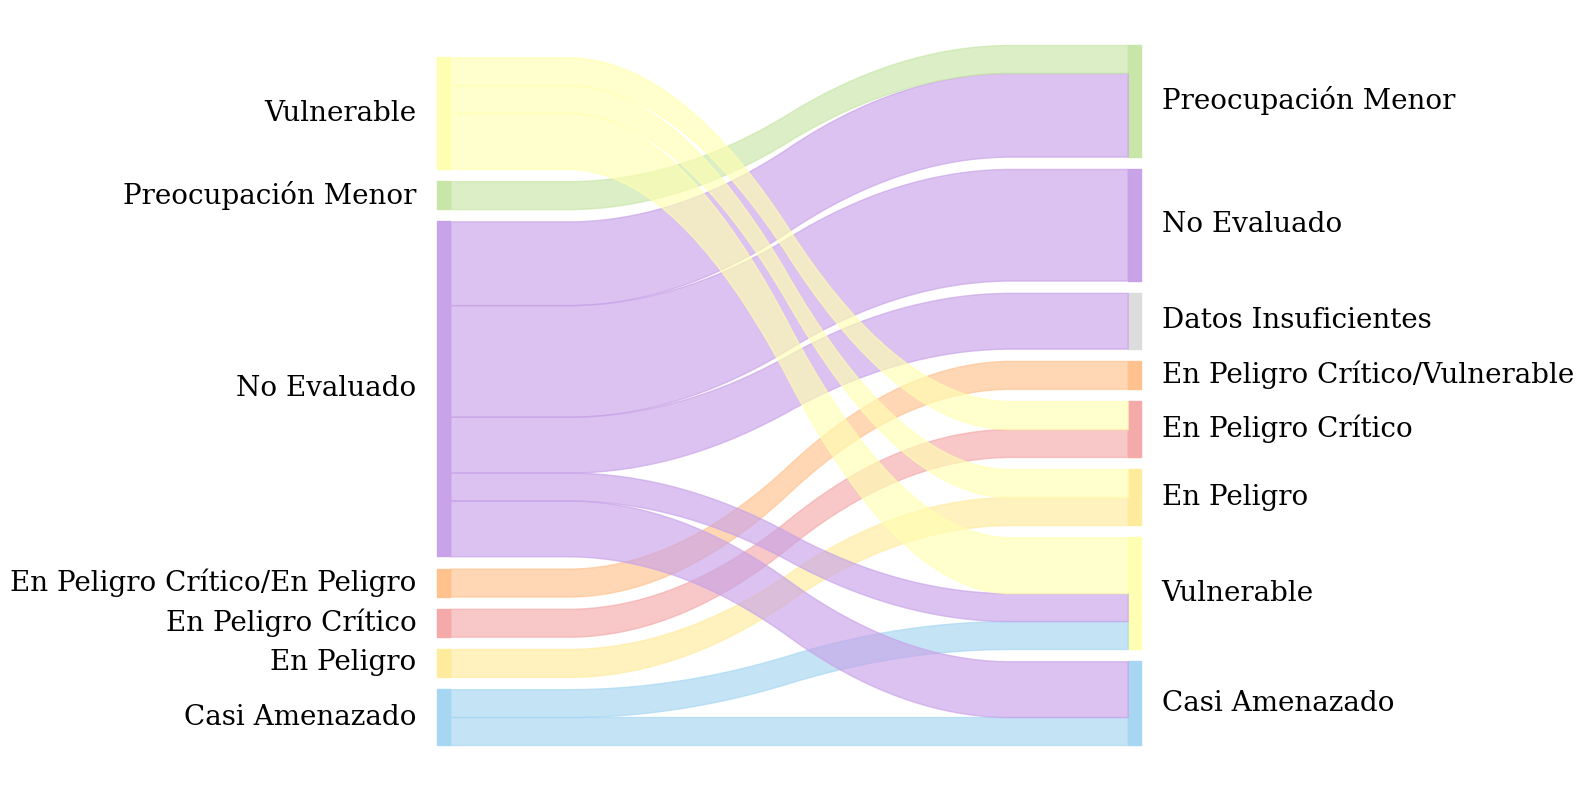

In [242]:
# Creación de la figura
sankey(
    left=censo_categoria3["Nombre_categoria_2004"], 
    right=censo_categoria3["Nombre_cetegoria_2021"], 
    leftWeight= censo_categoria3["num_especies"], 
    rightWeight=censo_categoria3["num_especies"], 
    aspect=50, fontsize=20, colorDict=color
)

fig = plt.gcf()

# Indicamos el tamaño
fig.set_size_inches(10, 10)

# Ponemos el color del fondo blanco
fig.set_facecolor("w")

fig.savefig("cambio_estado_especies_sankey.png", bbox_inches="tight", dpi=300)

fig.show()

### Suburst para el tipo de categoria

In [243]:

censo_sun = censo[['speciesid', 'speciesname', 'NOMBRE COMÚN', 'Catalan name', 'Scientific name','Ordre' ,'count_aves', 'year', 'EVOLUCIÓN CATEGORÍA 2004-2021', 'LR2004', 'Nombre_categoria_2004', 'Estatus Consolidado', 'Nombre_cetegoria_2021']]

censo_sun_2023 = censo_sun[censo_sun['year'] == 2023]
censo_sun_2007 = censo_sun[censo_sun['year'] == 2007]


In [244]:
fig = px.sunburst(censo_sun_2023,
                  path=['EVOLUCIÓN CATEGORÍA 2004-2021', 'Estatus Consolidado' ,'NOMBRE COMÚN'], # Creo la jerarquia
                  values='count_aves',
                  title='Numero de Individuos por Cambio de Estado de Conservación y Especie en 2023',
                  color='EVOLUCIÓN CATEGORÍA 2004-2021',
                  color_discrete_map=color,
                  hover_name = 'NOMBRE COMÚN',
                  hover_data={
                          "NOMBRE COMÚN": True,
                          'Catalan name':True,
                          'Ordre':True,
                          "Scientific name": True,
                          "count_aves":True,
                          'EVOLUCIÓN CATEGORÍA 2004-2021':True, 
                          'Estatus Consolidado':True, 
                          'Nombre_categoria_2004':True,
                          'Nombre_cetegoria_2021':True
                          }, 
                  height=1000,  
                  width=1000 
                 )

# Personalización del hover data
fig.update_traces(
      hovertemplate="<b>Orden:</b> %{customdata[2]}<br>" + # El orden
                  "<b>Especie:</b> %{label}<br>" + # El nombre científico
                  "<b>Nombre Catalán:</b> %{customdata[1]}<br>" + 
                  "<b>Nombre Científico:</b> %{customdata[3]}<br>" + 
                  "<b>Estado de conservación 2021:</b> %{customdata[8]}<br>" +
                  "<b>Estado de conservación 2004:</b> %{customdata[7]}<br>" +
                  "<b>Cambio de Estado:</b> %{customdata[5]}<br>"
                  "<b>Observaciones:</b> %{value}<extra></extra>",
    textfont=dict(size=12, family="Arial", color="black"),
    insidetextfont=dict(family="Arial", size=14, color="black", weight="bold"), 
    insidetextorientation='radial'
)

fig.show()

# Guardar archivo en HTML
fig.write_html("sun_individuos_cambio_estado_conservacion_especie_2023.html")

In [245]:
fig = px.sunburst(censo_sun_2023,
                  path=['Estatus Consolidado' ,'NOMBRE COMÚN'], # Creo la jerarquia
                  values='count_aves',
                  title='Numero de Individuos por Cambio de Estado de Conservación y Especie en 2023',
                  color= 'Estatus Consolidado',
                  color_discrete_map= color,
                  hover_name = 'NOMBRE COMÚN',
                  hover_data={
                          "NOMBRE COMÚN": True,
                          'Catalan name':True,
                          'Ordre':True,
                          "Scientific name": True,
                          "count_aves":True,
                          'EVOLUCIÓN CATEGORÍA 2004-2021':True, 
                          'Estatus Consolidado':True,
                          'Nombre_categoria_2004':True,
                          'Nombre_cetegoria_2021':True
                          }, 
                  height=1000,  
                  width=1000 
                 )

# Personalización del hover data
fig.update_traces(
      hovertemplate="<b>Orden:</b> %{customdata[2]}<br>" + # El orden
                  "<b>Especie:</b> %{label}<br>" + # El nombre científico
                  "<b>Nombre Catalán:</b> %{customdata[1]}<br>" + 
                  "<b>Nombre Científico:</b> %{customdata[3]}<br>" + 
                  "<b>Estado de conservación 2021:</b> %{customdata[8]}<br>" +
                  "<b>Estado de conservación 2004:</b> %{customdata[7]}<br>" +
                  "<b>Cambio de Estado:</b> %{customdata[5]}<br>"
                  "<b>Observaciones:</b> %{value}<extra></extra>",
    textfont=dict(size=12, family="Arial", color="black"),
    insidetextfont=dict(family="Arial", size=14, color="black", weight="bold"), 
    insidetextorientation='radial'
)

fig.show()

# Guardar archivo en HTML
fig.write_html("sun_individuos_cambio_especie_2023.html")